# Dostihy a sázky

Jak jsou na tom jednotlivá pole a jednotliví koně? Podívejme se...

*Dostihy a sázky* is a clone of Monopoly, but with horses.

In [8]:
# Some necessary imports
import random
import copy
from matplotlib import pyplot as plt 
from matplotlib import rc
import os
import numpy as np

rc('text', usetex=True)

In [9]:
# Define data

places = [
    'START', 'Fantome', 'Finance', 'Gavora', 'Veterinární vyšetření', 
    'Trenér', 'Lady Anne', 'Náhoda', 'Pasek', 'Koran', 'Distanc', 
    'Neklan', 'Přeprava', 'Portlancl', 'Japan', 'Trenér', 'Kostrava', 
    'Finance', 'Lukava', 'Melák', 'Parkoviště', 'Grifel', 'Náhoda', 
    'Mohyla', 'Metál', 'Trenér', 'Tara', 'Furioso', 'Stáje', 'Genius', 
    'Podezření z dopingu', 'Shagga', 'Dahoman', 'Finance', 'Gira', 
    'Trenér', 'Náhoda', 'Narcius', 'Veterinární vyšetření', 'Napoli'    
]

place_names = [
    'START', 'Fantome', 'Finance 1', 'Gavora', 'Veterinární vyšetření 1', 
    '1. trenér', 'Lady Anne', 'Náhoda 1', 'Pasek', 'Koran', 'Distanc', 
    'Neklan', 'Přeprava', 'Portlancl', 'Japan', '2. trenér', 'Kostrava', 
    'Finance 2', 'Lukava', 'Melák', 'Parkoviště', 'Grifel', 'Náhoda 2', 
    'Mohyla', 'Metál', '3. trenér', 'Tara', 'Furioso', 'Stáje', 'Genius', 
    'Podezření z dopingu', 'Shagga', 'Dahoman', 'Finance 3', 'Gira', 
    '4. trenér', 'Náhoda 3', 'Narcius', 'Veterinární vyšetření 2', 'Napoli'    
]

distanc_card = "Zrušen distanc (kartu lze zachovat pro pozdější použití, nebo prodat)."
chance_cards = [
    {"name": "Jdi o 3 pole zpět.", "type": "move", "effect": ("places", -3)},
    {"name": distanc_card, "type": "keep"},
    {"name": "Jedeš se zúčastnit trenérského kurzu. Postoupíš na nejbližší pole Trenér. Dostaneš 4.000, pokud jedeš dopředu přes Start.", 
     "type": "move", "effect": ("next", "Trenér")},
    {"name": "Zdržíš se na 2 kola.", "type": "wait", "effect": ("turns", 2)},
    {"name": "Distanc (bez 4.000).", "type": "move", "effect": ("next", "Distanc")},
    {"name": "Zpět na nejbližší pole Finance.", "type": "move", "effect": ("prev", "Finance")},
    {"name": "Zpět na poslední pole ve hře (kůň Napoli), hráč obdrží 4.000.", "type": "move", "effect": ("prev", "Napoli")},
    {"name": "Zpět na pole Distanc. Obdržíš 4.000, pokud jsi cestou zpět prošel Start.", "type": "move", "effect": ("prev", "Distanc")},
    {"name": "Zpět na nejbližší pole Finance.", "type": "move", "effect": ("prev", "Finance")},
    {"name": "Zpět na start (hráč obdrží 4.000).", "type": "move", "effect": ("prev", "START")},
    {"name": "Zpět na start (bez 4.000).", "type": "move", "effect": ("prev", "START")},
    {"name": "Zpět na start (bez 4.000).", "type": "move", "effect": ("prev", "START")},
    {"name": "Zdržíš se na 2 kola.", "type": "wait", "effect": ("turns", 2)},
    {"name": "Zdržíš se na 1 kolo.", "type": "wait", "effect": ("turns", 1)},
    {"name": "Zpět na pole Parkoviště. Dostaneš 4.000, pokud jsi cestou zpět prošel start.", "type": "move", "effect": ("prev", "Parkoviště")}
]

horse_stats = {
    "Fantome": {"color": "orange", "price": 1200, "stables": 40, "race-1": 200, "race-2": 600, "race-3": 1800, "race-4": 3200, "race-main": 5000, "race-cost": 1000, "main-cost": 1000}, 
    "Gavora": {"color": "orange", "price": 1200, "stables": 40, "race-1": 200, "race-2": 600, "race-3": 1800, "race-4": 3200, "race-main": 5000, "race-cost": 1000, "main-cost": 1000}, 
    "Lady Anne": {"color": "sienna", "price": 2000, "stables": 120, "race-1": 600, "race-2": 1800, "race-3": 5400, "race-4": 8000, "race-main": 11000, "race-cost": 1000, "main-cost": 1000}, 
    "Pasek": {"color": "sienna", "price": 2000, "stables": 120, "race-1": 600, "race-2": 1800, "race-3": 5400, "race-4": 8000, "race-main": 11000, "race-cost": 1000, "main-cost": 1000}, 
    "Koran": {"color": "sienna", "price": 2400, "stables": 160, "race-1": 800, "race-2": 2000, "race-3": 6000, "race-4": 9000, "race-main": 12000, "race-cost": 1000, "main-cost": 1000}, 
    "Neklan": {"color": "skyblue", "price": 2800, "stables": 200, "race-1": 1000, "race-2": 3000, "race-3": 9000, "race-4": 12500, "race-main": 15000, "race-cost": 2000, "main-cost": 2000}, 
    "Portlancl": {"color": "skyblue", "price": 2800, "stables": 200, "race-1": 1000, "race-2": 3000, "race-3": 9000, "race-4": 12500, "race-main": 15000, "race-cost": 2000, "main-cost": 2000}, 
    "Japan": {"color": "skyblue", "price": 2800, "stables": 240, "race-1": 1200, "race-2": 3600, "race-3": 10000, "race-4": 14000, "race-main": 18000, "race-cost": 2000, "main-cost": 2000}, 
    "Kostrava": {"color": "limegreen", "price": 3600, "stables": 280, "race-1": 1400, "race-2": 4000, "race-3": 11000, "race-4": 15000, "race-main": 19000, "race-cost": 2000, "main-cost": 2000}, 
    "Lukava": {"color": "limegreen", "price": 3600, "stables": 280, "race-1": 1400, "race-2": 4000, "race-3": 11000, "race-4": 15000, "race-main": 19000, "race-cost": 2000, "main-cost": 2000}, 
    "Melák": {"color": "limegreen", "price": 4000, "stables": 320, "race-1": 1600, "race-2": 4400, "race-3": 12000, "race-4": 16000, "race-main": 20000, "race-cost": 2000, "main-cost": 2000}, 
    "Grifel": {"color": "deeppink", "price": 4400, "stables": 360, "race-1": 1800, "race-2": 5000, "race-3": 14000, "race-4": 17000, "race-main": 21000, "race-cost": 3000, "main-cost": 3000}, 
    "Mohyla": {"color": "deeppink", "price": 4400, "stables": 360, "race-1": 1800, "race-2": 5000, "race-3": 14000, "race-4": 17000, "race-main": 21000, "race-cost": 3000, "main-cost": 3000}, 
    "Metál": {"color": "deeppink", "price": 4800, "stables": 400, "race-1": 2000, "race-2": 6000, "race-3": 15000, "race-4": 18000, "race-main": 22000, "race-cost": 3000, "main-cost": 3000}, 
    "Tara": {"color": "gold", "price": 5200, "stables": 440, "race-1": 2200, "race-2": 6600, "race-3": 16000, "race-4": 19500, "race-main": 23000, "race-cost": 3000, "main-cost": 3000}, 
    "Furioso": {"color": "gold", "price": 5200, "stables": 440, "race-1": 2200, "race-2": 6600, "race-3": 16000, "race-4": 19500, "race-main": 23000, "race-cost": 3000, "main-cost": 3000}, 
    "Genius": {"color": "gold", "price": 5600, "stables": 580, "race-1": 2400, "race-2": 7200, "race-3": 17000, "race-4": 20500, "race-main": 24000, "race-cost": 3000, "main-cost": 3000}, 
    "Shagga": {"color": "seagreen", "price": 6000, "stables": 500, "race-1": 2600, "race-2": 7800, "race-3": 18000, "race-4": 22000, "race-main": 25500, "race-cost": 4000, "main-cost": 4000}, 
    "Dahoman": {"color": "seagreen", "price": 6000, "stables": 500, "race-1": 2600, "race-2": 7800, "race-3": 18000, "race-4": 22000, "race-main": 25500, "race-cost": 4000, "main-cost": 4000}, 
    "Gira": {"color": "seagreen", "price": 6400, "stables": 560, "race-1": 3000, "race-2": 9000, "race-3": 20000, "race-4": 24000, "race-main": 28000, "race-cost": 4000, "main-cost": 4000}, 
    "Narcius": {"color": "indigo", "price": 7000, "stables": 700, "race-1": 3500, "race-2": 10000, "race-3": 22000, "race-4": 26000, "race-main": 30000, "race-cost": 4000, "main-cost": 4000}, 
    "Napoli": {"color": "indigo", "price": 8000, "stables": 1000, "race-1": 4000, "race-2": 12000, "race-3": 28000, "race-4": 34000, "race-main": 40000, "race-cost": 4000, "main-cost": 4000}, 
}

earning_hits = ['stables', 'race-1', 'race-2', 'race-3', 'race-4', 'race-main']
earning_hit_names = ['Prohlídka stájí', '1. dostih', '2. dostih', '3. dostih', '4. dostih', 'Hlavní dostih']

place_colors = [horse_stats[p]["color"] if p in horse_stats else "lightgray" for p in place_names]

In [20]:
# some usefullness

def roll_dice():
    """
    Roll a 6-sided dice, if a 6 is rolled, roll again and sum results.
    """
    n = random.randint(1, 6)
    if n == 6:
        n += random.randint(1, 6)
    return n

def draw_chance():
    """
    Get a new card from the chance pack. If the pack is depleted, reshuffle it.
    """
    global chance_pack
    global evicted_cards
    if len(chance_pack) == 0:                      
        chance_pack = copy.deepcopy(chance_cards)
        for c in chance_pack:
            if c["name"] in evicted_cards:
                chance_pack.remove(c)
        random.shuffle(chance_pack)
    return chance_pack.pop()

def go_to(loc_from, name, direction = 1):
    """
    Go to a named place from current location in the specified direction.
    """
    loc = loc_from
    while not places[loc] == name:
        loc += direction
        loc = loc % len(places)
    return loc

def next_throw(location, timeout, hand):
    """
    Process a next dice throw for a player. Modify the players location and if necessary, add some timeout.
    """
    global evicted_cards
    dice = roll_dice()
    next_loc = location
    next_timeout = timeout

    if timeout > 0:
        # player is obliged to wait by some exteranal action (chance card)
        return location, timeout - 1
    
    if places[location] == 'Distanc':
        # player is obliged to stay at "Distanc" until he rolls six
        if distanc_card in hand:
            # continue
            hand.remove(distanc_card)
            evicted_cards.remove(distanc_card)
        elif dice >= 6:
            # if a 6 has been rolled, roll again to find out the delta
            dice = roll_dice()
        else:
            return location, next_timeout
    
    if dice == 12:
        # two sixes mean a trip to "Distanc"
        next_loc = go_to(location, "Distanc")
        return next_loc, next_timeout
    else:
        next_loc = (next_loc + dice) % len(places)
        if places[next_loc] == "Náhoda":
            # some chance cards move you around the game plan or wait a few rounds
            card = draw_chance()
            if card["type"] == "move":
                if card["effect"][0] == "places":
                    next_loc = (next_loc + card["effect"][1]) % len(places)
                    return next_loc, next_timeout
                elif card["effect"][0] == "next":
                    next_loc = go_to(next_loc, card["effect"][1], direction=1)
                    return next_loc, next_timeout
                elif card["effect"][0] == "prev":
                    next_loc = go_to(next_loc, card["effect"][1], direction=-1)
                    return next_loc, next_timeout
                else:
                    print(card)
                    raise NotImplementedError
            elif card["type"] == "wait":
                return next_loc, card["effect"][1]
            elif card["type"] == "keep":
                hand.append(card["name"])
                evicted_cards.append(card["name"])
                return next_loc, next_timeout
            else:
                return next_loc, next_timeout
        else:
            return next_loc, next_timeout
        
    # in case we forgot something
    raise NotImplementedError
    

def get_costs(event, stats):
    """
    Get cost for an event. This is probably quite controversial.
    """
    if event == 'stables':
        return stats['price']
    elif event == 'race-1':
        return 1 * stats['race-cost']
    elif event == 'race-2':
        return 2 * stats['race-cost']
    elif event == 'race-3':
        return 3 * stats['race-cost']
    elif event == 'race-4':
        return 4 * stats['race-cost']
    elif event == 'race-main':
        return 4 * stats['race-cost'] + stats['main-cost']
    raise NotImplementedError

In [21]:
# setup the game (a large number of turns for smoothing)
no_players = 4
no_turns = 1000000

# prepare a chance card pack
chance_pack = copy.deepcopy(chance_cards)
random.shuffle(chance_pack)
evicted_cards = []

# setup data structures
player_locations = [0 for i in range(no_players)]
player_timeouts = [0 for i in range(no_players)]
player_hands = [[] for i in range(no_players)]
player_hits = [np.array([0 for i in range(len(places))]) for j in range(no_players)]

# run the "simulation"
for t in range(no_turns):
    for p in range(no_players):
        turn = next_throw(player_locations[p], player_timeouts[p], player_hands[p])
        player_locations[p] = turn[0]
        player_timeouts[p] = turn[1]
        player_hits[p][player_locations[p]] += 1

In [22]:
# gather results
tot_hits = player_hits[0]
for p in range(1, no_players):
    tot_hits = tot_hits + np.array(player_hits[p])

place_results = [{"name": place_names[i], "hits": tot_hits[i]} for i in range(len(place_names))]
horse_results = [{"name": place_names[i], "hits": tot_hits[i]} for i in range(len(place_names)) if place_names[i] in horse_stats]

for hr in horse_results:
    q = hr["hits"] / (no_turns * no_players)
    
    for k in earning_hits:
        hr[k] = q * horse_stats[hr["name"]][k]

In [23]:
# plotting setup
base_dir = 'images/{}'.format(no_players)
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

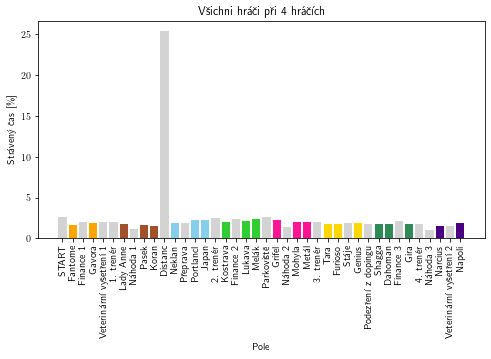

In [24]:
# plot place histograms
   
plt.figure(figsize=(8, 4))
plt.bar(place_names, 100 * tot_hits / (no_turns * no_players), color=place_colors)
plt.xticks(rotation=90)
plt.xlabel("Pole")
plt.ylabel("Strávený čas [\%]")
plt.title('Všichni hráči při {} hráčích'.format(no_players))
plt.show()

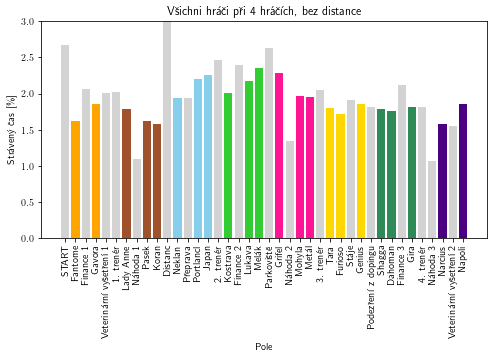

In [25]:
# plot place histograms (limit view)
   
plt.figure(figsize=(8, 4))
plt.bar(place_names, 100 * tot_hits / (no_turns * no_players), color=place_colors)
plt.xticks(rotation=90)
plt.xlabel("Pole")
plt.ylabel("Strávený čas [\%]")
plt.title('Všichni hráči při {} hráčích, bez distance'.format(no_players))
plt.ylim(0, 3)
plt.show()

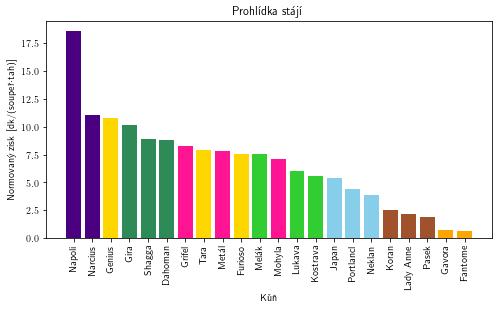

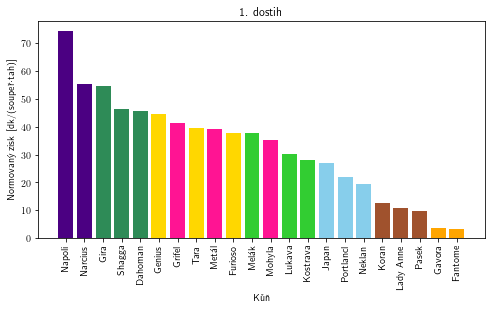

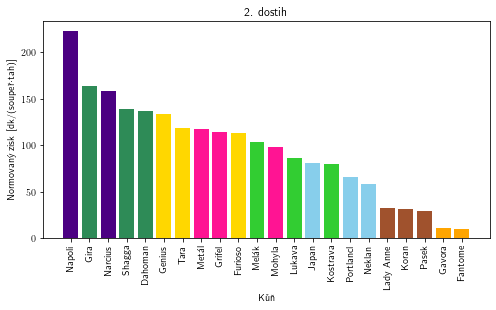

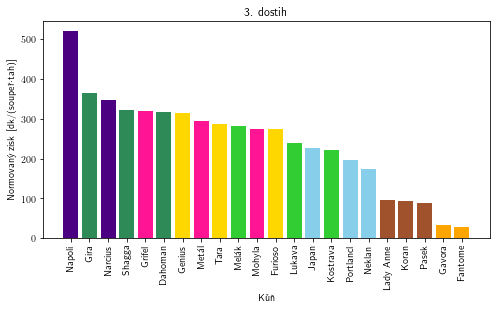

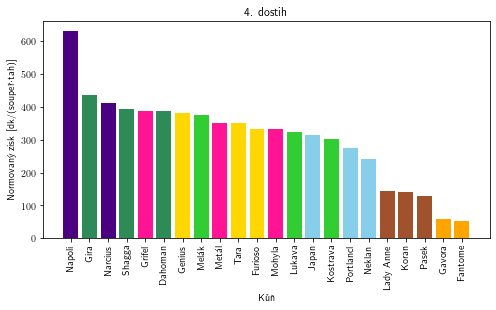

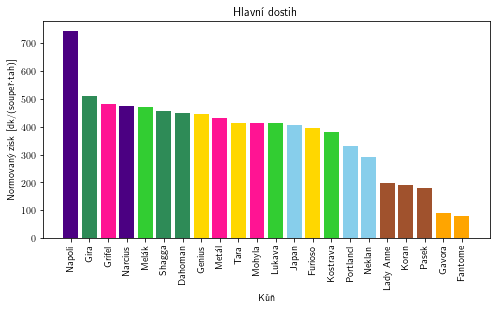

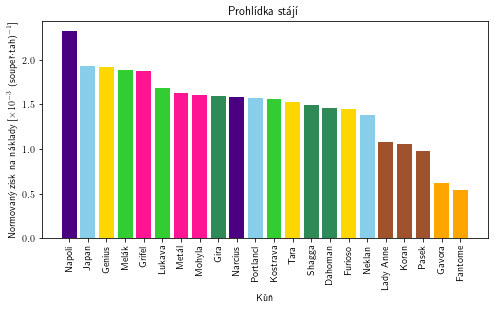

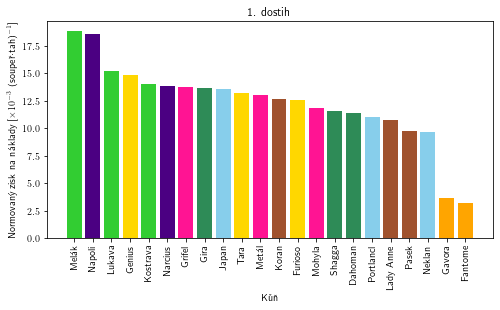

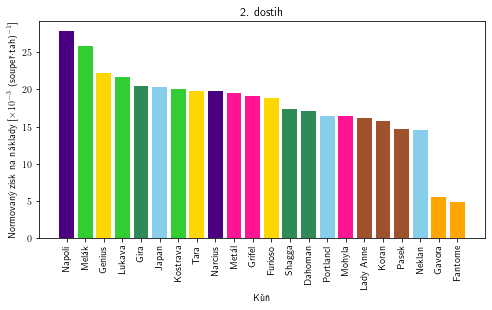

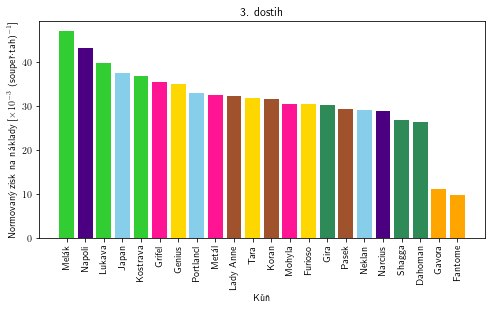

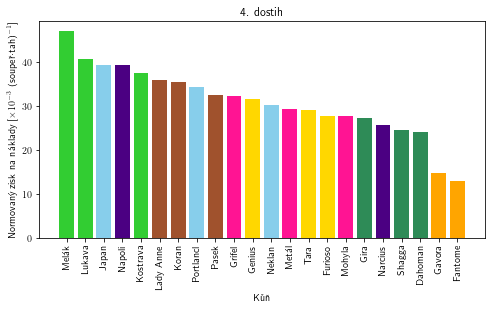

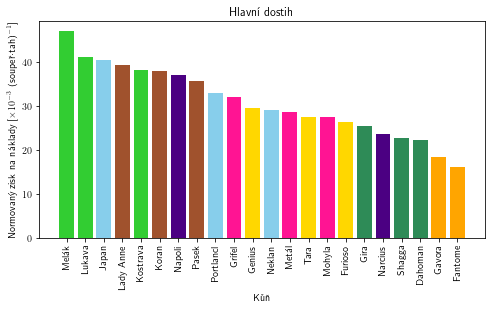

In [26]:
# plot earnings evaluation for individual contests

for i, k in enumerate(earning_hits):
    sorted_results = sorted(horse_results, key=lambda h: h[k], reverse=True)
    bar_x = [r["name"] for r in sorted_results]
    bar_v = [r[k] for r in sorted_results]
    bar_c = [horse_stats[r["name"]]["color"] for r in sorted_results]
    
    
    plt.figure(figsize=(8, 4))
    plt.bar(bar_x, bar_v, color=bar_c)
    plt.xticks(rotation=90)
    plt.xlabel("Kůň")
    plt.ylabel("Normovaný zisk [dk/(soupeř$\cdot$tah)]")
    plt.title(earning_hit_names[i])

# plot earnings evaluation for individual contests (normalized by purchase price)

for i, k in enumerate(earning_hits):
    sorted_results = sorted(horse_results, key=lambda h: h[k]/get_costs(k, horse_stats[h["name"]]), reverse=True)
    bar_x = [r["name"] for r in sorted_results]
    bar_v = [1000*r[k]/get_costs(k, horse_stats[r["name"]]) for r in sorted_results]
    bar_c = [horse_stats[r["name"]]["color"] for r in sorted_results]    
    
    plt.figure(figsize=(8, 4))
    plt.bar(bar_x, bar_v, color=bar_c)
    plt.xticks(rotation=90)
    plt.xlabel("Kůň")
    plt.ylabel("Normovaný zisk na náklady [$\\times10^{-3}$ (soupeř$\cdot$tah)$^{-1}$]")
    plt.title(earning_hit_names[i])
